In [2]:
import os
import numpy as np
import matplotlib.pyplot as plt
from moviepy import VideoFileClip

In [3]:
# Method to plot the audio waveform of a video file

def plot_audio_waveform_from_array(audio_array, fps):
    # If stereo, convert to mono by averaging channels
    if audio_array.ndim > 1:
        audio_data = np.mean(audio_array, axis=1)
    else:
        audio_data = audio_array

    audio_data = np.abs(audio_data)

    duration = len(audio_data) / fps
    time_axis = np.linspace(0, duration, num=len(audio_data))

    plt.figure(figsize=(12, 4))
    plt.plot(time_axis, audio_data, color='steelblue')
    plt.title("Audio Waveform")
    plt.xlabel("Time (seconds)")
    plt.ylabel("Amplitude")
    plt.grid(True)
    plt.tight_layout()
    plt.show()

In [ ]:
# Method to detect Claps 

def detect_claps_in_audio(audio_array, fps, min_gap, threshold):
    # If stereo, reduce to mono by averaging channels
    if audio_array.ndim > 1:
        audio_data = np.mean(audio_array, axis=1)
    else:
        audio_data = audio_array

    abs_audio = np.abs(audio_data)
    
    claps = []
    last_clap_time = -np.inf

    for i, sample_val in enumerate(abs_audio):
        if sample_val > threshold:
            clap_time = i / float(fps)
            if (clap_time - last_clap_time) >= min_gap:
                claps.append((clap_time, i))
                last_clap_time = clap_time


    return claps

In [4]:
# Method to detect Claps using segmentation (first and last segments only)

def detect_claps_first_last_segments(audio_array, fps, num_segments):
    # If stereo, reduce to mono by averaging channels
    if audio_array.ndim > 1:
        audio_data = np.mean(audio_array, axis=1)
    else:
        audio_data = audio_array

    abs_audio = np.abs(audio_data)
    segment_length = len(abs_audio) // num_segments
    claps = []

    # Process only the first and last segments
    segments_to_process = [0, num_segments - 1]
    for segment_index in segments_to_process:
        start_idx = segment_index * segment_length
        end_idx = (segment_index + 1) * segment_length if segment_index < num_segments - 1 else len(abs_audio)
        segment = abs_audio[start_idx:end_idx]
        
        if len(segment) > 0:
            # Find the maximum value in the segment
            max_idx = segment.argmax()

            clap_time = (start_idx + max_idx) / float(fps)
            claps.append((clap_time, start_idx + max_idx))

    return claps


In [13]:
# Method to process videos in a directory

def process_videos_in_directory(directory_path, audio_output_dir, num_segments):
    video_extension = ".mp4"
    clap_results = []

    # Create the audio output directory if it doesn't exist
    if not os.path.exists(audio_output_dir):
        os.makedirs(audio_output_dir)

    for filename in os.listdir(directory_path):
        file_path = os.path.join(directory_path, filename)
        if os.path.isfile(file_path) and os.path.splitext(filename.lower())[1] == video_extension:

            print(f"\nProcessing video: {filename}")
            try:
                clip = VideoFileClip(file_path)
                audio = clip.audio
                if audio is None:
                    print("  No audio track found.")
                    continue

                fps = audio.fps
                audio_array = audio.to_soundarray()

                # Save the audio to a file
                audio_output_path = os.path.join(audio_output_dir, f"{os.path.splitext(filename)[0]}.wav")
                audio.write_audiofile(audio_output_path)
                print(f"  Audio saved to {audio_output_path}")

                # Plot the audio waveform from the extracted array
                plot_audio_waveform_from_array(audio_array, fps)

                # Now detect claps
                claps = detect_claps_first_last_segments(audio_array, fps=fps, num_segments=num_segments)

                if claps:
                    for c_time, frame in claps:
                        print(f"  Clap detected at {c_time:.2f} seconds (frame {frame})")

                clap_results.append({"Filename": filename,
                                     "Start Clap Seconds": claps[0][0],
                                     "End Clap Seconds": claps[1][0],
                                     "Start Clap Frame": claps[0][1],
                                     "End Clap Frame": claps[1][1],
                                     "Audio Path": audio_output_path})


            except Exception as e:
                print(f"  Error processing {filename}: {e}")

    return clap_results



Processing video: GX010003.MP4
MoviePy - Writing audio in c:\Users\niki\Desktop\Step-counter\Data\audio\GX010003.wav


MoviePy - Done.
  Audio saved to c:\Users\niki\Desktop\Step-counter\Data\audio\GX010003.wav


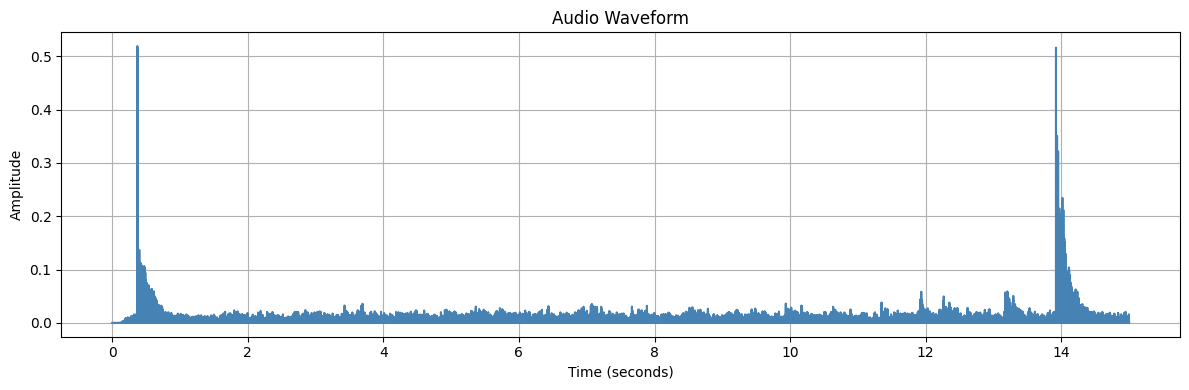

  Clap detected at 0.37 seconds (frame 16434)
  Clap detected at 13.92 seconds (frame 613915)

Processing video: GX010004.MP4
MoviePy - Writing audio in c:\Users\niki\Desktop\Step-counter\Data\audio\GX010004.wav


MoviePy - Done.
  Audio saved to c:\Users\niki\Desktop\Step-counter\Data\audio\GX010004.wav


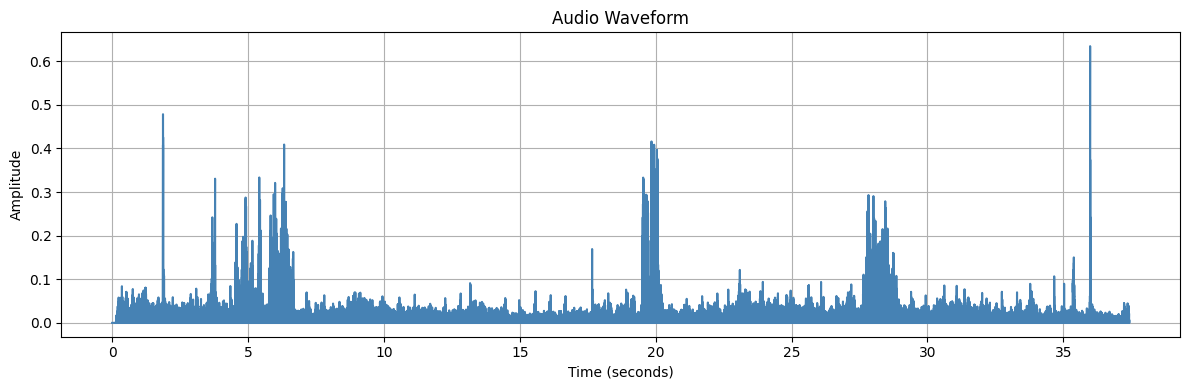

  Clap detected at 1.87 seconds (frame 82545)
  Clap detected at 35.98 seconds (frame 1586913)

Processing video: GX010005.MP4
MoviePy - Writing audio in c:\Users\niki\Desktop\Step-counter\Data\audio\GX010005.wav


MoviePy - Done.
  Audio saved to c:\Users\niki\Desktop\Step-counter\Data\audio\GX010005.wav


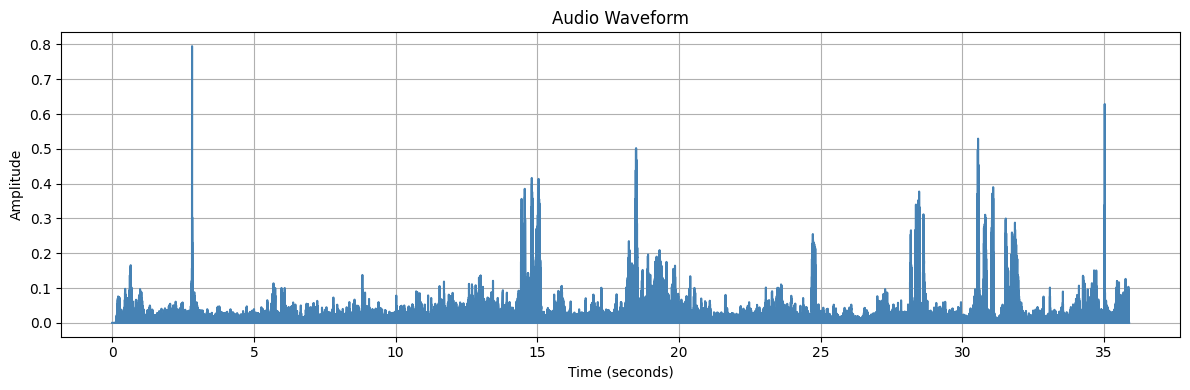

  Clap detected at 2.82 seconds (frame 124400)
  Clap detected at 35.03 seconds (frame 1544733)

Processing video: GX010006.MP4
MoviePy - Writing audio in c:\Users\niki\Desktop\Step-counter\Data\audio\GX010006.wav


MoviePy - Done.
  Audio saved to c:\Users\niki\Desktop\Step-counter\Data\audio\GX010006.wav


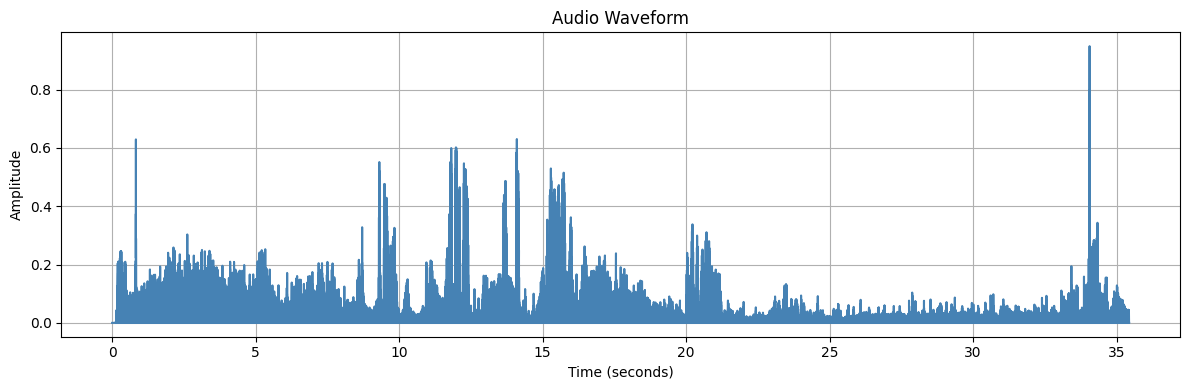

  Clap detected at 0.83 seconds (frame 36529)
  Clap detected at 34.06 seconds (frame 1502108)

Processing video: GX010007.MP4
MoviePy - Writing audio in c:\Users\niki\Desktop\Step-counter\Data\audio\GX010007.wav


MoviePy - Done.
  Audio saved to c:\Users\niki\Desktop\Step-counter\Data\audio\GX010007.wav


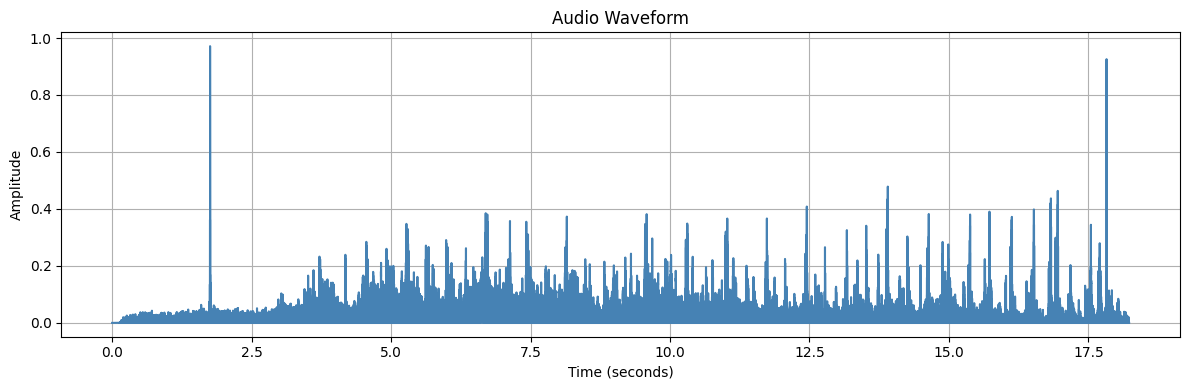

  Clap detected at 1.76 seconds (frame 77432)
  Clap detected at 17.82 seconds (frame 786072)

Processing video: GX010008.MP4
MoviePy - Writing audio in c:\Users\niki\Desktop\Step-counter\Data\audio\GX010008.wav


MoviePy - Done.
  Audio saved to c:\Users\niki\Desktop\Step-counter\Data\audio\GX010008.wav


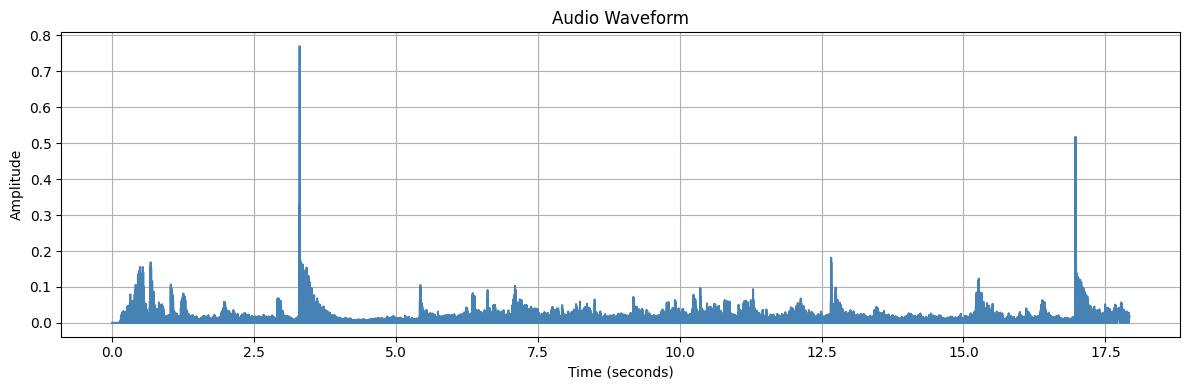

  Clap detected at 3.30 seconds (frame 145730)
  Clap detected at 16.97 seconds (frame 748593)

Processing video: GX010009.MP4
MoviePy - Writing audio in c:\Users\niki\Desktop\Step-counter\Data\audio\GX010009.wav


MoviePy - Done.
  Audio saved to c:\Users\niki\Desktop\Step-counter\Data\audio\GX010009.wav


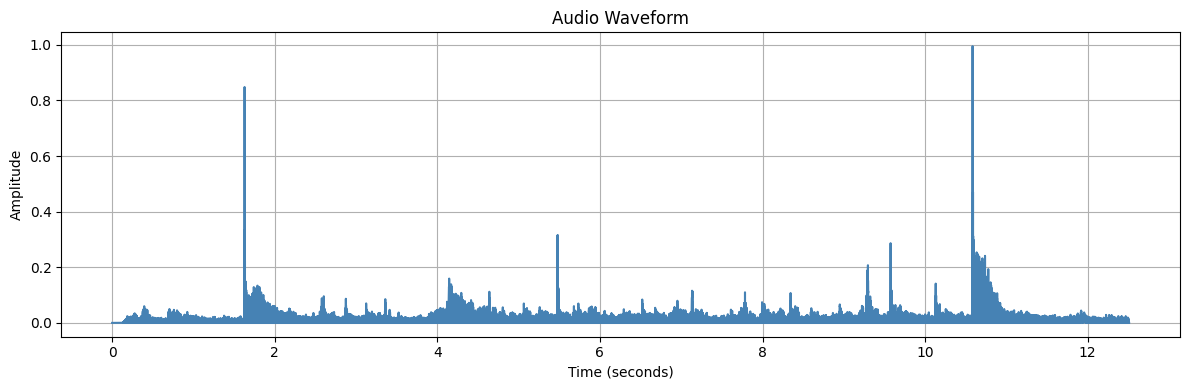

  Clap detected at 1.63 seconds (frame 71849)
  Clap detected at 10.58 seconds (frame 466760)

Processing video: GX010011.MP4
MoviePy - Writing audio in c:\Users\niki\Desktop\Step-counter\Data\audio\GX010011.wav


MoviePy - Done.
  Audio saved to c:\Users\niki\Desktop\Step-counter\Data\audio\GX010011.wav


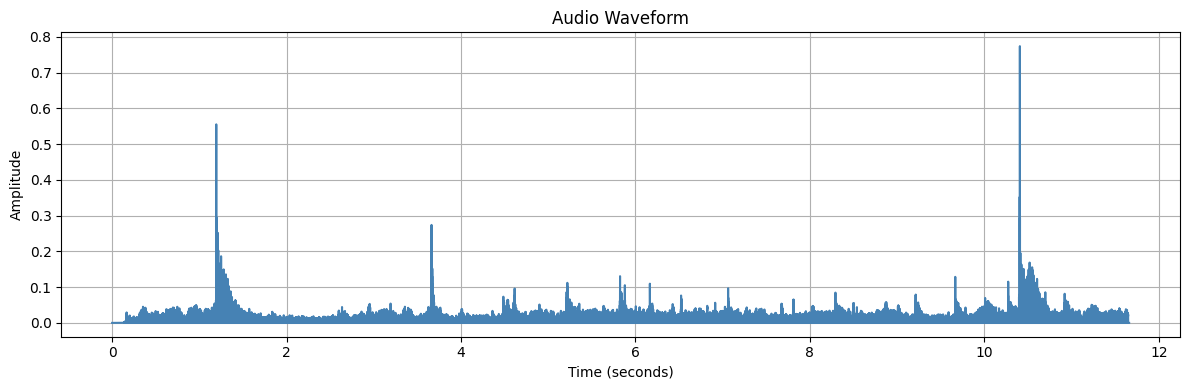

  Clap detected at 1.19 seconds (frame 52654)
  Clap detected at 10.41 seconds (frame 458956)

Processing video: GX010012.MP4
MoviePy - Writing audio in c:\Users\niki\Desktop\Step-counter\Data\audio\GX010012.wav


MoviePy - Done.
  Audio saved to c:\Users\niki\Desktop\Step-counter\Data\audio\GX010012.wav


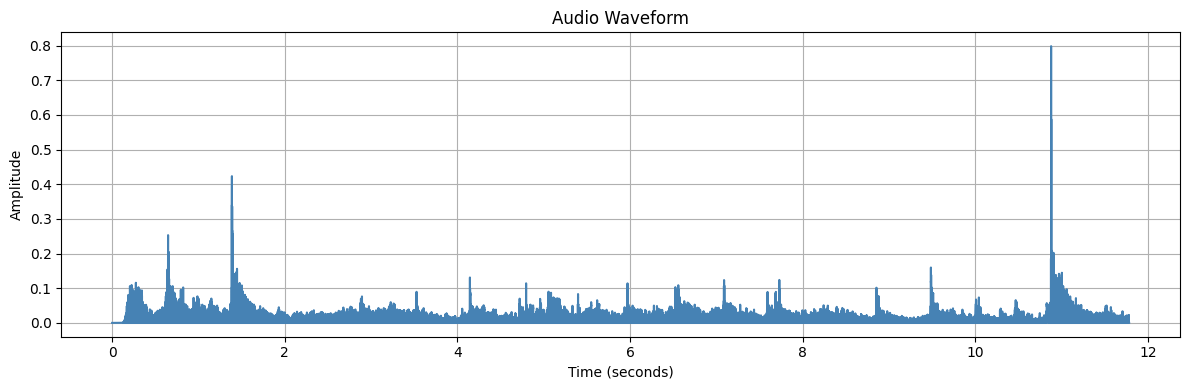

  Clap detected at 1.39 seconds (frame 61185)
  Clap detected at 10.88 seconds (frame 479636)

Processing video: GX010013.MP4
MoviePy - Writing audio in c:\Users\niki\Desktop\Step-counter\Data\audio\GX010013.wav


MoviePy - Done.
  Audio saved to c:\Users\niki\Desktop\Step-counter\Data\audio\GX010013.wav


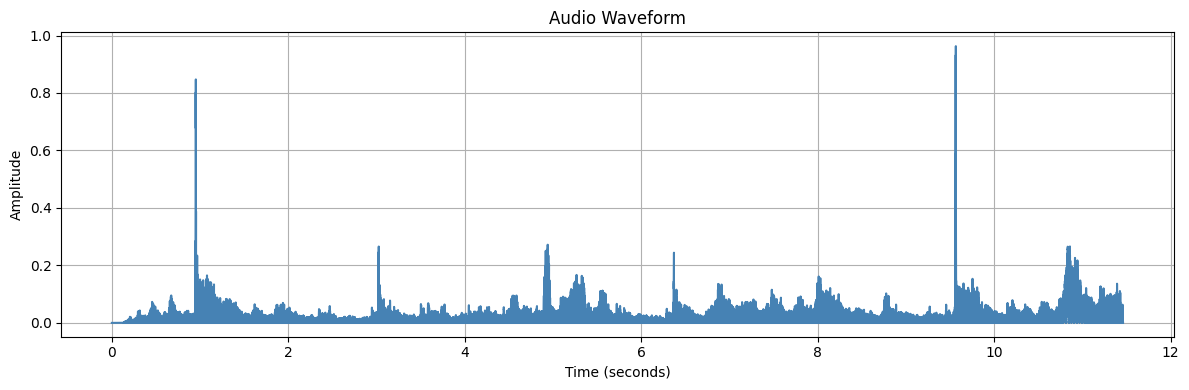

  Clap detected at 0.95 seconds (frame 41977)
  Clap detected at 9.56 seconds (frame 421812)

Processing video: GX010014.MP4
MoviePy - Writing audio in c:\Users\niki\Desktop\Step-counter\Data\audio\GX010014.wav


MoviePy - Done.
  Audio saved to c:\Users\niki\Desktop\Step-counter\Data\audio\GX010014.wav


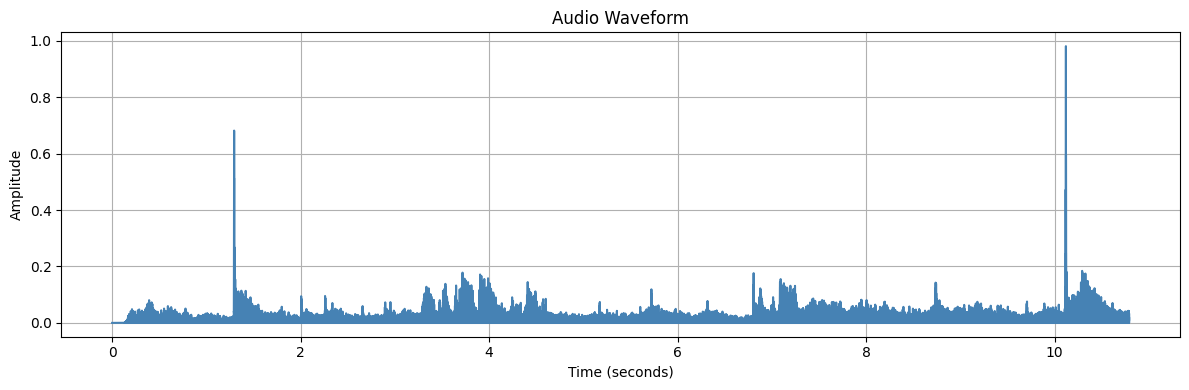

  Clap detected at 1.29 seconds (frame 57091)
  Clap detected at 10.12 seconds (frame 446246)

Processing video: GX010015.MP4
MoviePy - Writing audio in c:\Users\niki\Desktop\Step-counter\Data\audio\GX010015.wav


MoviePy - Done.
  Audio saved to c:\Users\niki\Desktop\Step-counter\Data\audio\GX010015.wav


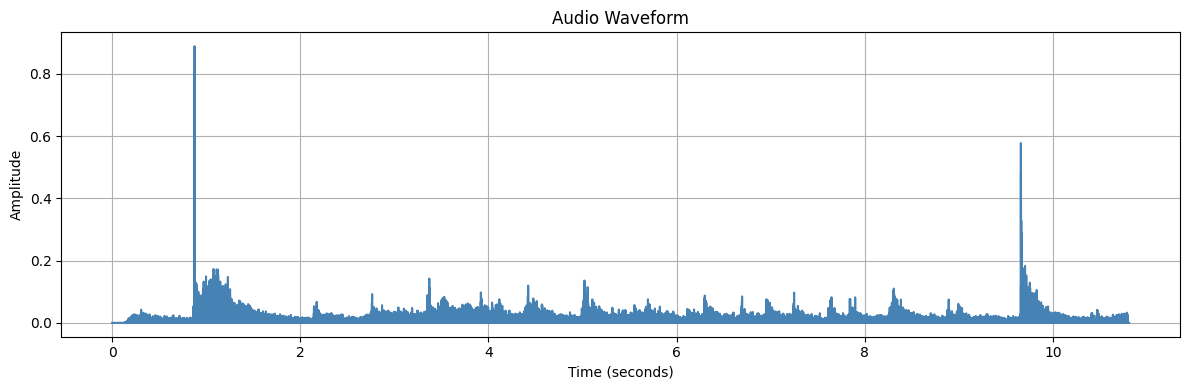

  Clap detected at 0.88 seconds (frame 38646)
  Clap detected at 9.66 seconds (frame 425970)

Processing video: GX010016.MP4
MoviePy - Writing audio in c:\Users\niki\Desktop\Step-counter\Data\audio\GX010016.wav


MoviePy - Done.
  Audio saved to c:\Users\niki\Desktop\Step-counter\Data\audio\GX010016.wav


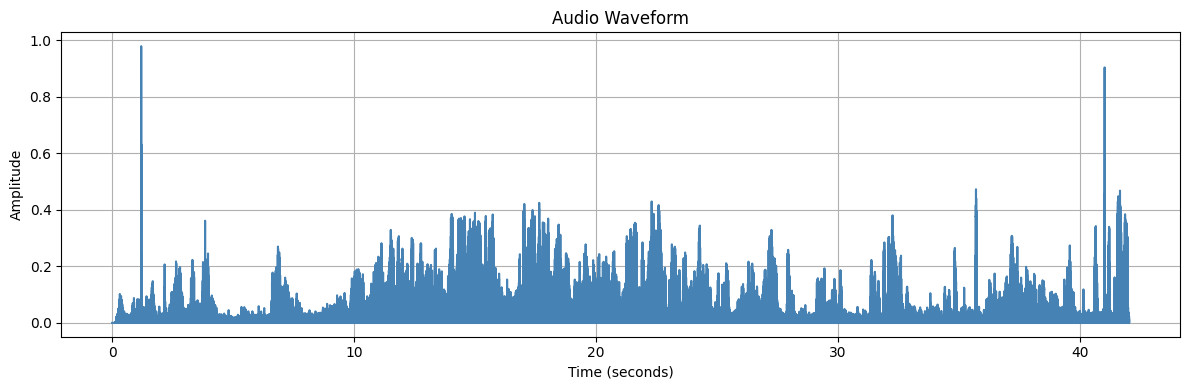

  Clap detected at 1.20 seconds (frame 53035)
  Clap detected at 41.04 seconds (frame 1809690)

Processing video: GX010017.MP4
MoviePy - Writing audio in c:\Users\niki\Desktop\Step-counter\Data\audio\GX010017.wav


MoviePy - Done.
  Audio saved to c:\Users\niki\Desktop\Step-counter\Data\audio\GX010017.wav


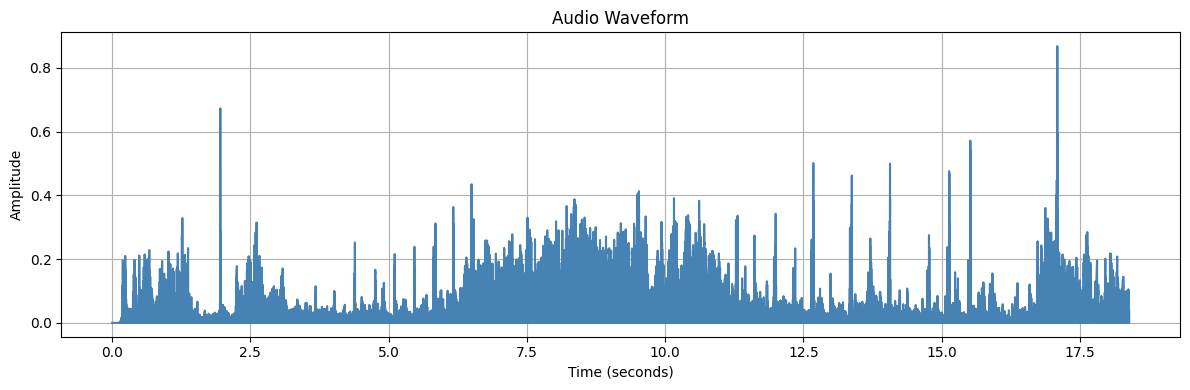

  Clap detected at 1.96 seconds (frame 86269)
  Clap detected at 17.09 seconds (frame 753719)


[{'Filename': 'GX010003.MP4',
  'Start Clap Seconds': 0.3726530612244898,
  'End Clap Seconds': 13.920975056689342,
  'Start Clap Frame': 16434,
  'End Clap Frame': 613915,
  'Audio Path': 'c:\\Users\\niki\\Desktop\\Step-counter\\Data\\audio\\GX010003.wav'},
 {'Filename': 'GX010004.MP4',
  'Start Clap Seconds': 1.8717687074829932,
  'End Clap Seconds': 35.984421768707485,
  'Start Clap Frame': 82545,
  'End Clap Frame': 1586913,
  'Audio Path': 'c:\\Users\\niki\\Desktop\\Step-counter\\Data\\audio\\GX010004.wav'},
 {'Filename': 'GX010005.MP4',
  'Start Clap Seconds': 2.820861678004535,
  'End Clap Seconds': 35.02795918367347,
  'Start Clap Frame': 124400,
  'End Clap Frame': 1544733,
  'Audio Path': 'c:\\Users\\niki\\Desktop\\Step-counter\\Data\\audio\\GX010005.wav'},
 {'Filename': 'GX010006.MP4',
  'Start Clap Seconds': 0.8283219954648526,
  'End Clap Seconds': 34.06140589569161,
  'Start Clap Frame': 36529,
  'End Clap Frame': 1502108,
  'Audio Path': 'c:\\Users\\niki\\Desktop\\Step-c

In [14]:
directory_path = os.path.join(os.path.dirname(os.getcwd()), "Data\\Neuer Ordner")
audio_output_path = os.path.join(os.path.dirname(os.getcwd()), "Data\\audio")
process_videos_in_directory(directory_path, num_segments= 4, audio_output_dir=audio_output_path)